In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

In [2]:
df = pd.read_csv(r"C:\Users\kgrab\Desktop\Python Jupyte Notebook\historical_election_poland_da\election_data.csv",
              sep=";")
df.head()

,election_date,election_type,foregin_registered_voters,foregin_voted_voters,total_voters,total_voted_voters,who_win
0,09.10.2005,pres_I,74115.0,52975.0,30260027.0,15051157.0,PO
1,23.10.2005,pres_II,80071.0,48196.0,30279209.0,15439684.0,PiS
2,20.06.2010,pres_I,198014.0,169094.0,30813005.0,16929088.0,PO
3,04.07.2010,pres_II,277016.0,203598.0,30833924.0,17054690.0,PO
4,10.05.2015,pres_I,196121.0,139055.0,30688570.0,14993571.0,PiS


In [3]:
df['%attendance'] = np.round(df['total_voted_voters']/df['total_voters'], 2)
df['%foregin_attendance'] = np.round(df['foregin_voted_voters']/df['foregin_registered_voters'], 2)
df

,election_date,election_type,foregin_registered_voters,foregin_voted_voters,total_voters,total_voted_voters,who_win,%attendance,%foregin_attendance
0,09.10.2005,pres_I,74115.0,52975.0,30260027.0,15051157.0,PO,0.50,0.71
1,23.10.2005,pres_II,80071.0,48196.0,30279209.0,15439684.0,PiS,0.51,0.60
2,20.06.2010,pres_I,198014.0,169094.0,30813005.0,16929088.0,PO,0.55,0.85
3,04.07.2010,pres_II,277016.0,203598.0,30833924.0,17054690.0,PO,0.55,0.73
4,10.05.2015,pres_I,196121.0,139055.0,30688570.0,14993571.0,PiS,0.49,0.71
5,24.05.2015,pres_II,257062.0,132380.0,30709281.0,16956615.0,PiS,0.55,0.51
6,28.06.2020,pres_I,373929.0,26457.0,30204241.0,19026173.0,PiS,0.63,0.07
7,12.07.2020,pres_II,524884.0,34692.0,30267989.0,20047104.0,PiS,0.66,0.07
8,25.09.2005,par,49840.0,35679.0,30229031.0,12263640.0,PiS,0.41,0.72
9,21.10.2007,par,190637.0,149183.0,30615471.0,16495045.0,PO,0.54,0.78


In [4]:
np.corrcoef(df['foregin_registered_voters'],df['total_voted_voters'])

array([[1.        , 0.95018961],
       [0.95018961, 1.        ]])

In [5]:
sns.set_style("whitegrid")

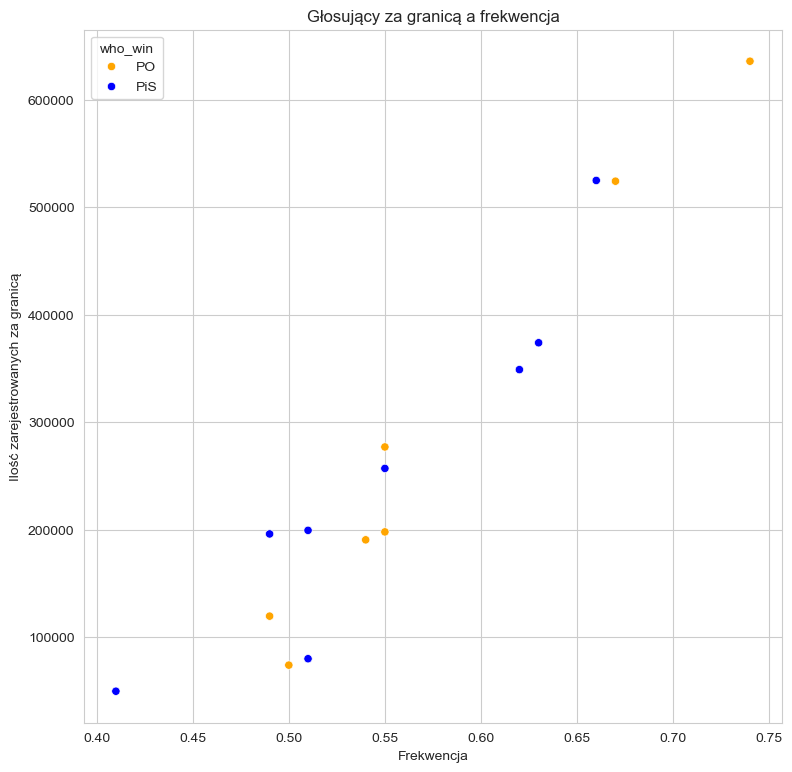

In [6]:
plt.figure(figsize=(9,9))

ax = sns.scatterplot(data = df, 
                    x = '%attendance', 
                    y = 'foregin_registered_voters', 
                    hue='who_win',
                    palette=['orange','blue'])


plt.title('Głosujący za granicą a frekwencja')
plt.xlabel('Frekwencja')
plt.ylabel('Ilość zarejestrowanych za granicą')

plt.show()

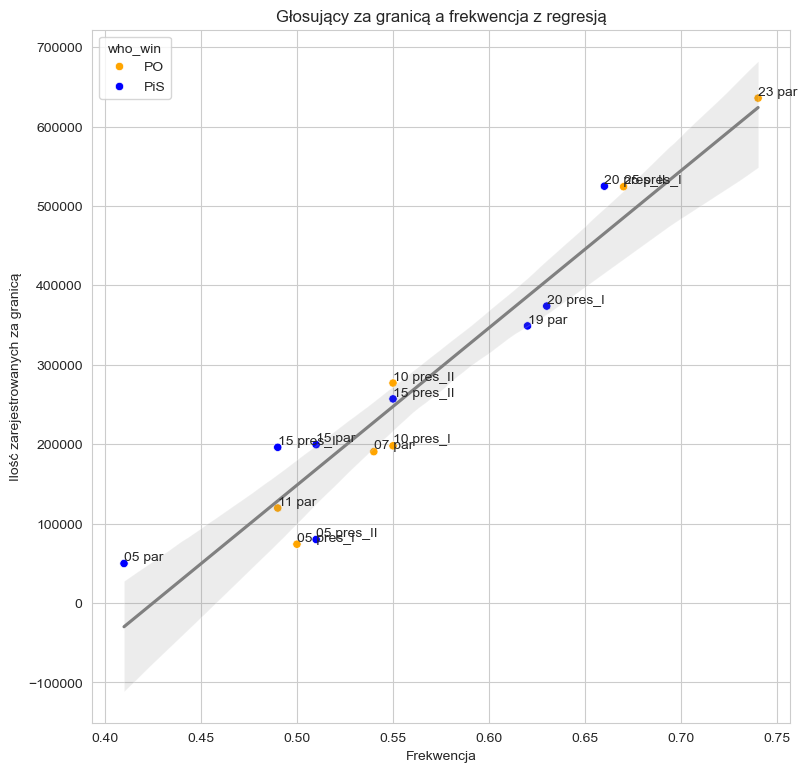

In [11]:
plt.figure(figsize=(9,9))

ax = sns.scatterplot(data = df, 
                    x = '%attendance', 
                    y = 'foregin_registered_voters', 
                    hue='who_win',
                    palette=['orange','blue'])

sns.regplot(data=df,
            x = '%attendance', 
            y = 'foregin_registered_voters',
            scatter=False,
            color='grey',
            ax=ax)


texts = []
for i in range(len(df)):
    x = df['%attendance'].iloc[i]
    y = df['foregin_registered_voters'].iloc[i]
    label = df['election_date'].iloc[i][8:] + ' ' + df['election_type'].iloc[i]  # 4 pierwsze znaki + election_type
    text = plt.text(
        x, y, 
        label,
        fontsize=10,
        ha='left', 
        va='bottom'
    )
    texts.append(text)
    
plt.title('Głosujący za granicą a frekwencja z regresją')
plt.xlabel('Frekwencja')
plt.ylabel('Ilość zarejestrowanych za granicą')

plt.show()

In [13]:
val = 695886

X = df['foregin_registered_voters'].values.reshape(-1, 1)
y = df['%attendance'].values

model = LinearRegression()
model.fit(X, y)

predicted_attendance = model.predict([[509482]])
print(f'Przewidywana frekwencja dla {val} zarejestrowanych: {predicted_attendance[0]:.2f}')

Przewidywana frekwencja dla 695886 zarejestrowanych: 0.67


In [9]:
import statsmodels.api as sm


X = df['foregin_registered_voters']
y = df['%attendance']

X_const = sm.add_constant(X)
model = sm.OLS(y, X_const).fit()

val = 695886

new_X = pd.DataFrame({'const': 1, 'foregin_registered_voters': val}, index=[0])

pred = model.get_prediction(new_X)
pred_summary = pred.summary_frame(alpha=0.05)

print(pred_summary)
print(f"Przewidywana frekwencja: {pred_summary['mean'].values[0]*100:.2f}%")
print(f"95% przedział ufności: [{pred_summary['mean_ci_lower'].values[0]*100:.2f}%, {pred_summary['mean_ci_upper'].values[0]*100:.2f}%]")


       mean   mean_se  mean_ci_lower  mean_ci_upper  obs_ci_lower  \
0  0.758255  0.017854       0.719685       0.796826      0.690117   

   obs_ci_upper  
0      0.826393  
Przewidywana frekwencja: 75.83%
95% przedział ufności: [71.97%, 79.68%]
